In [15]:
! pip install psycopg2-binary

Defaulting to user installation because normal site-packages is not writeable


In [63]:


import pandas as pd
import pandas.io.sql as sqlio
import psycopg2 as ps
import matplotlib.pyplot as plt
import numpy as np

In [6]:
#Init de la connexion à la db
conn = ps.connect(
    host="54.36.191.217",
    port="5432",
    dbname="postgres",
    user="postgres",
    password="epsi-test-abc")

In [7]:
# Fetch des datas
pdf = sqlio.read_sql_query("SELECT fk_annee as \"annees\", SUM(nb_chomage) as nb_chomage FROM mspr_ia.fait_nombre where nb_chomage IS NOT NULL group by fk_annee order by fk_annee", conn)
pdf

/tmp/ipykernel_28108/2608807861.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pdf = sqlio.read_sql_query("SELECT fk_annee as \"annees\", SUM(nb_chomage) as nb_chomage FROM mspr_ia.fait_nombre where nb_chomage IS NOT NULL group by fk_annee order by fk_annee", conn)


annees  nb_chomage
0     1996    476810.0
1     1997    484360.0
2     1998    483480.0
3     1999    479160.0
4     2000    459330.0
5     2001    400700.0
6     2002    406500.0
7     2003    426400.0
8     2004    442000.0
9     2005    449970.0
10    2006    435590.0
11    2007    404920.0
12    2008    381980.0
13    2009    422560.0
14    2010    503430.0
15    2011    527920.0
16    2012    557880.0
17    2013    608100.0
18    2014    640100.0
19    2015    678990.0
20    2016    714010.0
21    2017    730410.0
22    2018    728370.0
23    2019    728050.0
24    2020    710130.0
25    2021    759220.0
26    2022    700950.0
27    2023    680800.0

<Axes: xlabel='annees'>

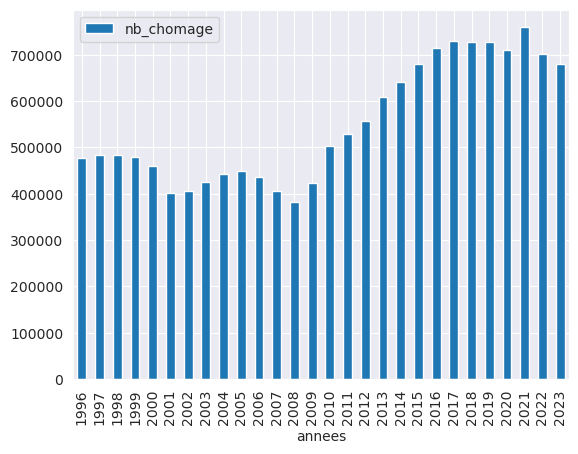

In [8]:
pdf.plot(kind="bar", x= "annees", y="nb_chomage")

In [9]:
pdf.describe()

annees     nb_chomage
count    28.000000      28.000000
mean   2009.500000  550790.000000
std       8.225975  128938.071038
min    1996.000000  381980.000000
25%    2002.750000  440397.500000
50%    2009.500000  493895.000000
75%    2016.250000  685837.500000
max    2023.000000  759220.000000

In [52]:
nb_votes_com= sqlio.read_sql_query("select \"FK_ANNEE\" as \"annees\", sum(nombre_de_votes) as \"nb_total_vote\", \"FK_PARTI\" as \"partis\" from mspr_ia.fait_vote  group by \"FK_PARTI\", \"FK_ANNEE\" order by \"FK_ANNEE\"", conn)

nb_votes_com

/tmp/ipykernel_28108/794517600.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  nb_votes_com= sqlio.read_sql_query("select \"FK_ANNEE\" as \"annees\", sum(nombre_de_votes) as \"nb_total_vote\", \"FK_PARTI\" as \"partis\" from mspr_ia.fait_vote  group by \"FK_PARTI\", \"FK_ANNEE\" order by \"FK_ANNEE\"", conn)


annees  nb_total_vote   partis
0      1958              0      CRR
1      1958          90429      COM
2      1958           7057     POUJ
3      1958          55277      UNR
4      1958           1108  RADCENT
..      ...            ...      ...
196    2022           1764      EXD
197    2022         127555      MDM
198    2022         202845       FN
199    2022          11662      RDG
200    2022          23918      DLF

[201 rows x 3 columns]

In [53]:
# Jointure des deux dataframes
final_pdf = pd.merge(pdf, nb_votes_com, on="annees")
final_pdf

annees  nb_chomage  nb_total_vote partis
0     1997    484360.0           2222    EXD
1     1997    484360.0          22694    DVD
2     1997    484360.0          72312    SOC
3     1997    484360.0          21313    DVG
4     1997    484360.0         109233    PRG
..     ...         ...            ...    ...
80    2022    700950.0           1764    EXD
81    2022    700950.0         127555    MDM
82    2022    700950.0         202845     FN
83    2022    700950.0          11662    RDG
84    2022    700950.0          23918    DLF

[85 rows x 4 columns]

/tmp/ipykernel_28108/1223785610.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-notebook')
/home/development/anaconda3/envs/epsi-test/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3460: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/development/anaconda3/envs/epsi-test/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3460: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/development/anaconda3/envs/epsi-test/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3460: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


ValueError: num must be an integer with 1 <= num <= 16, not 17

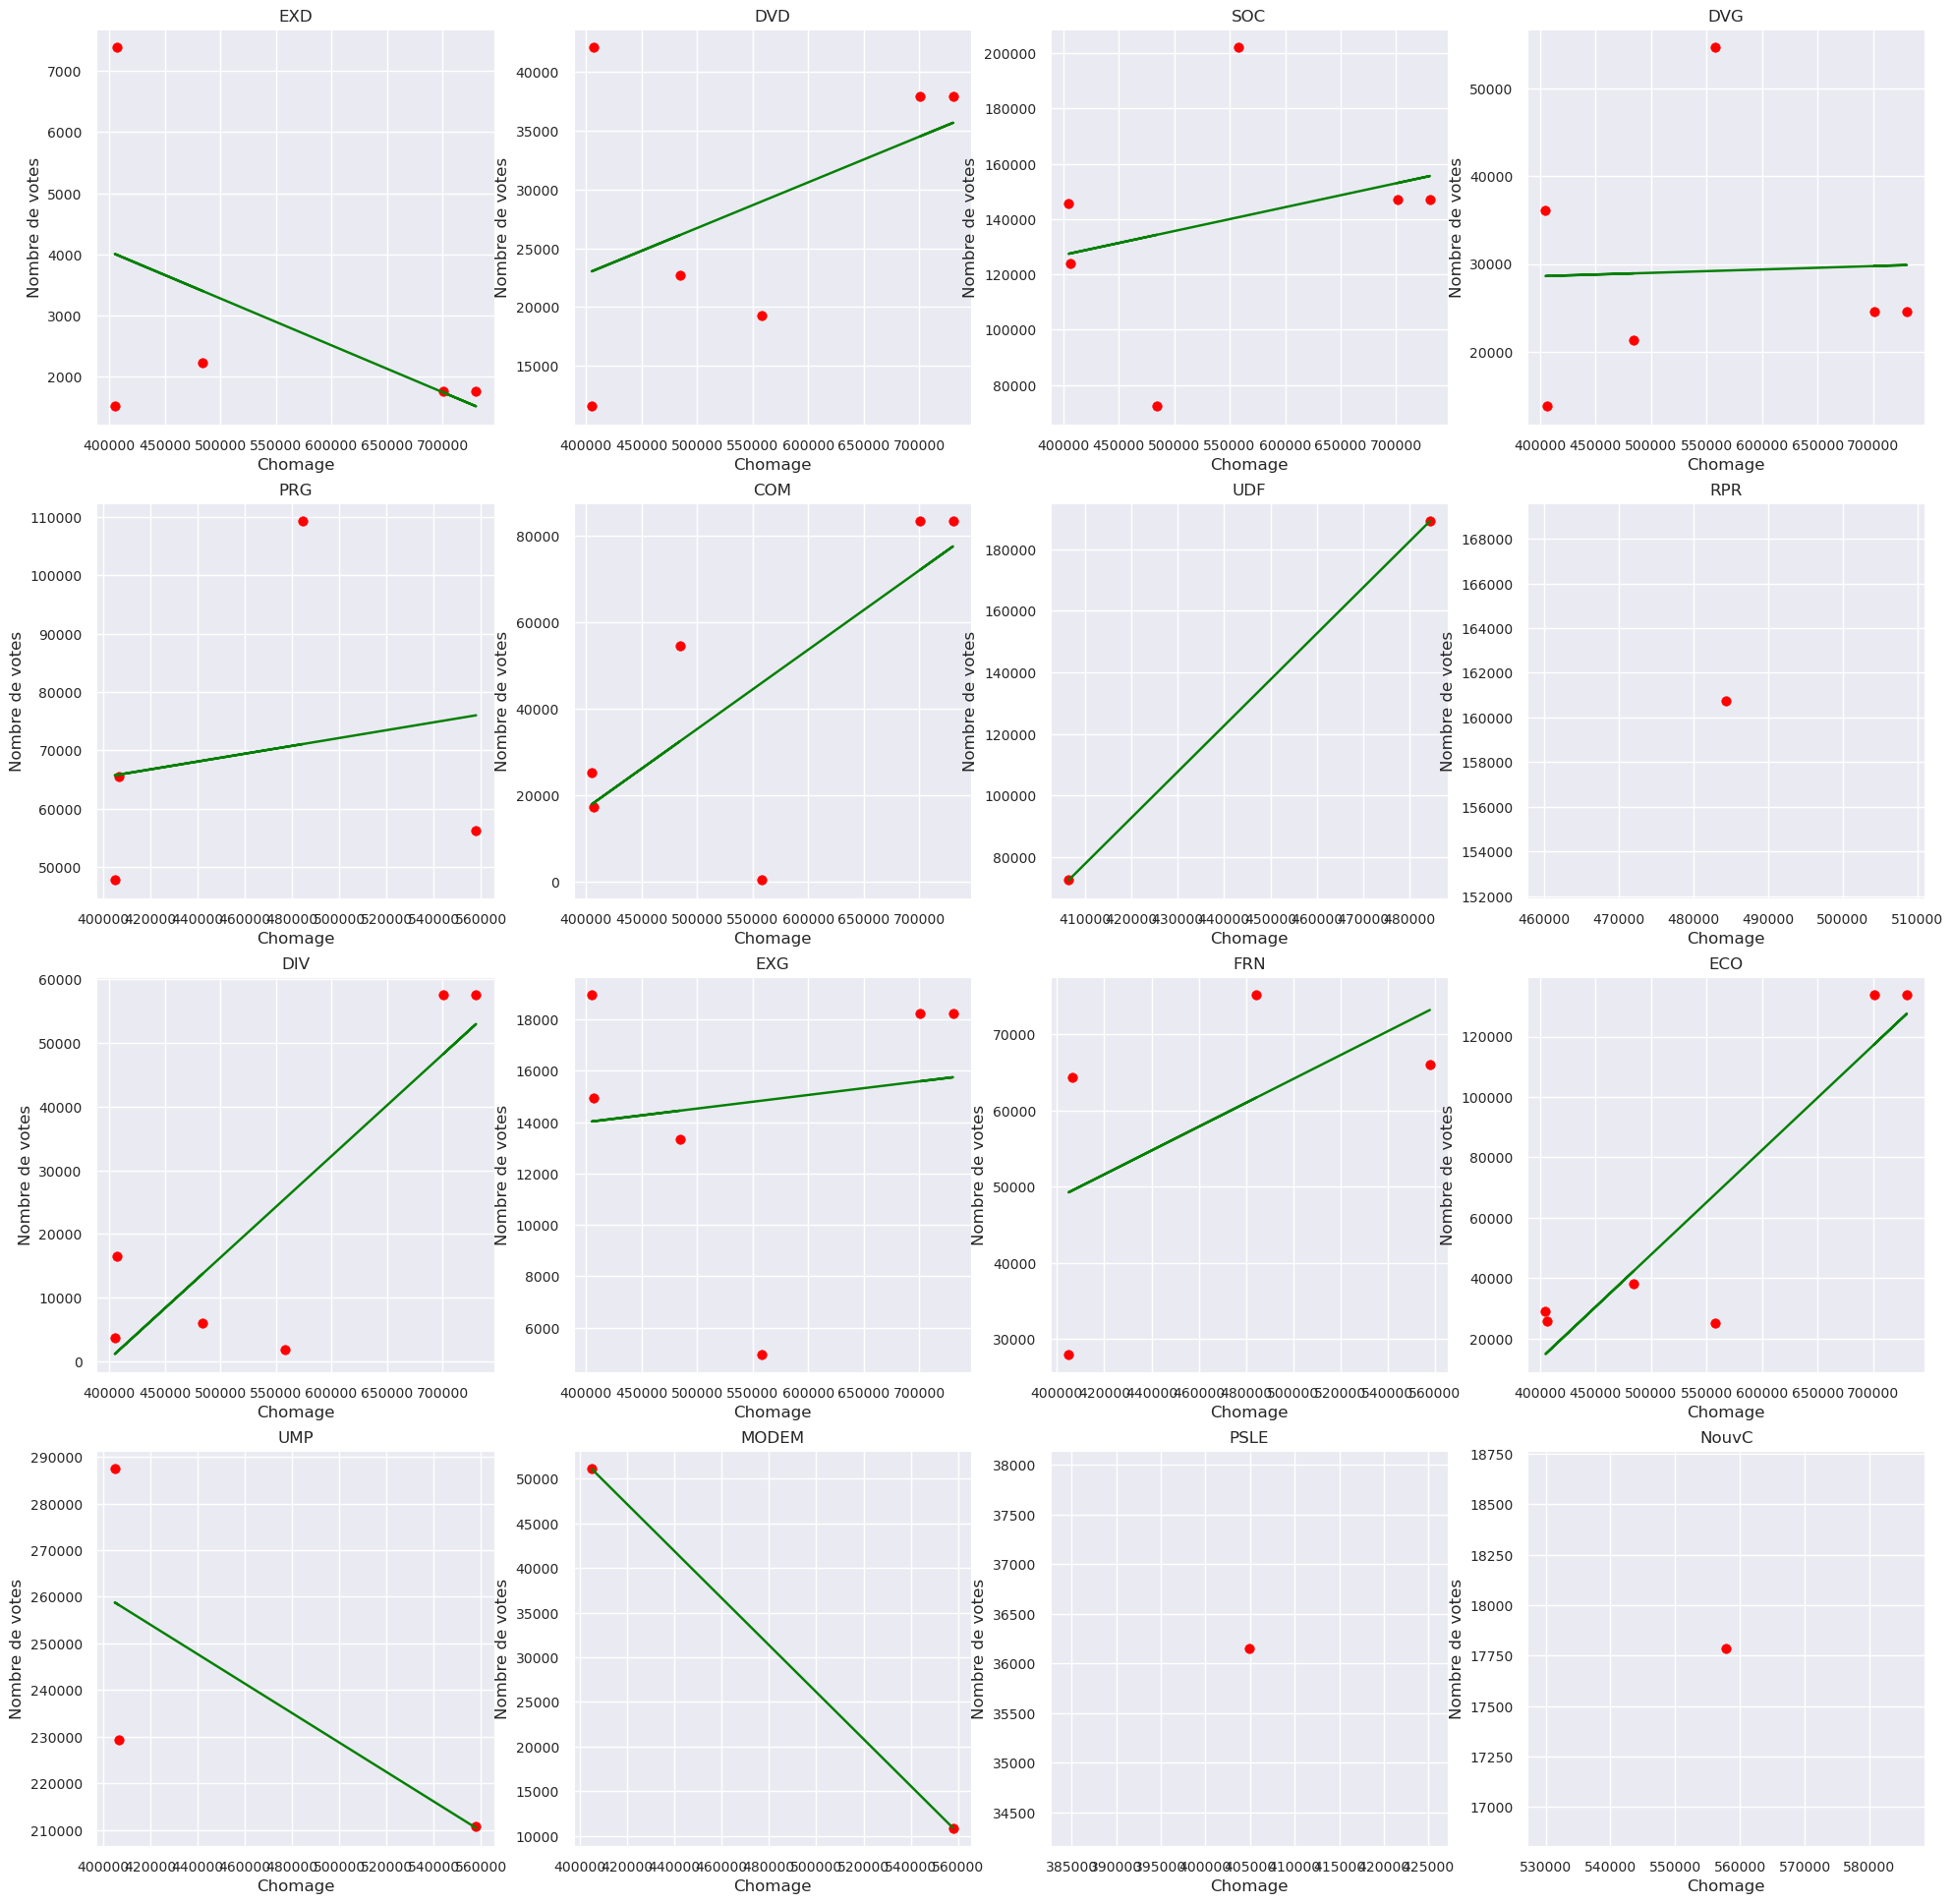

In [65]:
# Nuage de points variables explicatives vs variable à expliquer

plt.style.use('seaborn-notebook')
fig = plt.figure(figsize = (24, 24))

for index, parti in enumerate(final_pdf["partis"].unique()):
    df_parti = final_pdf.loc[final_pdf['partis'] == parti]
    ax = fig.add_subplot(4, 4, index + 1)
    m, b = np.polyfit(df_parti.nb_chomage, df_parti.nb_total_vote, 1)
    ax.scatter(x=df_parti.nb_chomage, y=df_parti.nb_total_vote, color="red")
    plt.plot(df_parti.nb_chomage, m*df_parti.nb_chomage+b, color="green")
    ax.set_ylabel('Nombre de votes', size = 12)
    ax.set_xlabel('Chomage', size = 12)
    ax.set_title(parti, size = 12)

plt.show()